In [1]:
#Importing there required libraries first

import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential 
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
#load the dataset

from keras.datasets import cifar10
(x_train,y_train), (x_test,y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 4s 0us/step


**Few details about our data**

In [3]:
print(type(x_train))
print(type(y_train))
print(type(x_test))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [4]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


**Images as arrays and pictures inside the dataset**

In [5]:
index=10
x_train[index]

array([[[53, 65, 53],
        [54, 63, 52],
        [56, 60, 50],
        ...,
        [47, 51, 50],
        [41, 45, 44],
        [24, 28, 27]],

       [[46, 59, 41],
        [53, 62, 45],
        [54, 59, 44],
        ...,
        [42, 46, 45],
        [39, 43, 42],
        [28, 32, 31]],

       [[45, 59, 38],
        [50, 60, 41],
        [46, 52, 34],
        ...,
        [38, 42, 41],
        [36, 40, 39],
        [29, 33, 32]],

       ...,

       [[71, 83, 66],
        [74, 83, 66],
        [80, 85, 67],
        ...,
        [51, 54, 33],
        [46, 49, 34],
        [49, 50, 41]],

       [[75, 82, 67],
        [79, 85, 69],
        [81, 85, 67],
        ...,
        [61, 65, 41],
        [64, 67, 48],
        [48, 50, 41]],

       [[85, 83, 71],
        [85, 84, 71],
        [86, 86, 70],
        ...,
        [61, 65, 39],
        [64, 67, 46],
        [49, 50, 41]]], dtype=uint8)

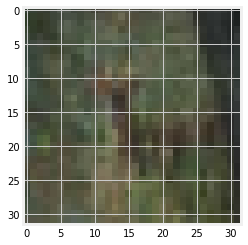

In [6]:
#check the image at index=10

img=plt.imshow(x_train[index])

In [7]:
print('image label', y_train[index])

image label [4]


In [8]:
#classify images into ten different classes/categories

classification = ['airplane', 'automobile','bird','cat','deer','dog','frog','horse','ship','truck']

#at index zero our image class is
print('Image class is:-', classification[y_train[index][0]])

Image class is:- deer


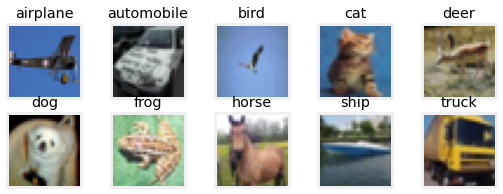

In [16]:
classes = 10
#visual representation of different categories
fig = plt.figure(figsize=(8,3))
for i in range(classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(y_train[:]==i)[0]
    features_idx = x_train[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = (features_idx[img_num,::])
    ax.set_title(classification[i])
    plt.imshow(im)
plt.show()

In [9]:
y_train_onehot= to_categorical(y_train)
y_test_onehot= to_categorical(y_test)

In [10]:
y_train_onehot

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [11]:
y_train_onehot[index]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

In [12]:
#to bring the pixels in values between 0 and 1
x_train=x_train/255
x_test=x_test/255

In [13]:
#check it;  
x_train[index]

array([[[0.20784314, 0.25490196, 0.20784314],
        [0.21176471, 0.24705882, 0.20392157],
        [0.21960784, 0.23529412, 0.19607843],
        ...,
        [0.18431373, 0.2       , 0.19607843],
        [0.16078431, 0.17647059, 0.17254902],
        [0.09411765, 0.10980392, 0.10588235]],

       [[0.18039216, 0.23137255, 0.16078431],
        [0.20784314, 0.24313725, 0.17647059],
        [0.21176471, 0.23137255, 0.17254902],
        ...,
        [0.16470588, 0.18039216, 0.17647059],
        [0.15294118, 0.16862745, 0.16470588],
        [0.10980392, 0.1254902 , 0.12156863]],

       [[0.17647059, 0.23137255, 0.14901961],
        [0.19607843, 0.23529412, 0.16078431],
        [0.18039216, 0.20392157, 0.13333333],
        ...,
        [0.14901961, 0.16470588, 0.16078431],
        [0.14117647, 0.15686275, 0.15294118],
        [0.11372549, 0.12941176, 0.1254902 ]],

       ...,

       [[0.27843137, 0.3254902 , 0.25882353],
        [0.29019608, 0.3254902 , 0.25882353],
        [0.31372549, 0

**Model Implementation**

In [14]:


model = Sequential()

model.add(Conv2D(32,(5,5), activation='relu', input_shape=(32,32,3)))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32,(5,5), activation='relu' ))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(1000, activation='relu'))

model.add(Dropout(0.5))

model.add(Dense(500, activation='relu'))

model.add(Dropout(0.5))

model.add(Dense(250, activation='relu'))

model.add(Dense(10, activation='softmax'))

In [15]:
#summary(duhh..)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 32)        25632     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 1000)              801000    
_________________________________________________________________
dropout (Dropout)            (None, 1000)              0

In [ ]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [ ]:
#Train the model
hist = model.fit(x_train, y_train_onehot,
                 batch_size = 256,
                 epochs = 10,
                 validation_split = 0.2)

Epoch 1/10
157/157 [==============================] - 57s 360ms/step - loss: 1.8030 - accuracy: 0.3241 - val_loss: 1.4948 - val_accuracy: 0.4506
Epoch 2/10
157/157 [==============================] - 56s 359ms/step - loss: 1.4118 - accuracy: 0.4818 - val_loss: 1.2546 - val_accuracy: 0.5499
Epoch 3/10
157/157 [==============================] - 57s 363ms/step - loss: 1.2669 - accuracy: 0.5411 - val_loss: 1.2155 - val_accuracy: 0.5634
Epoch 4/10
157/157 [==============================] - 57s 361ms/step - loss: 1.1572 - accuracy: 0.5857 - val_loss: 1.0901 - val_accuracy: 0.6121
Epoch 5/10
157/157 [==============================] - 57s 361ms/step - loss: 1.0654 - accuracy: 0.6214 - val_loss: 1.1036 - val_accuracy: 0.6119
Epoch 6/10
157/157 [==============================] - 57s 361ms/step - loss: 1.0023 - accuracy: 0.6464 - val_loss: 0.9955 - val_accuracy: 0.6475
Epoch 7/10
157/157 [==============================] - 57s 362ms/step - loss: 0.9281 - accuracy: 0.6717 - val_loss: 0.9963 - val_ac

In [ ]:
#evalute our model using test data
model.evaluate(x_test,y_test_onehot)[1]

313/313 [==============================] - 5s 16ms/step - loss: 0.9618 - accuracy: 0.6707


0.6707000136375427

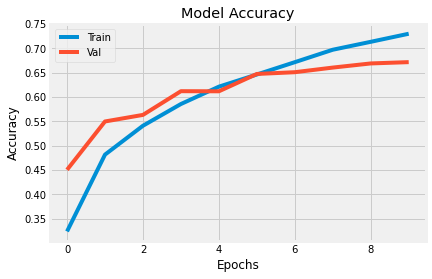

In [ ]:
#visualize models accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train','Val'], loc='upper left')
plt.show()

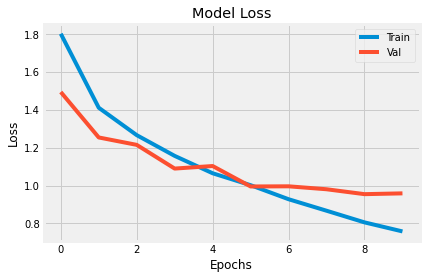

In [ ]:
#visualize models loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train','Val'], loc='upper right')
plt.show()

In [ ]:
#test the model
from google.colab import files
uploaded = files.upload()

Saving plane1.jpg to plane1.jpg


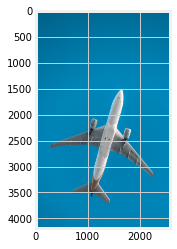

In [ ]:
#show the image
new_image = plt.imread('plane1.jpg')
img = plt.imshow(new_image)

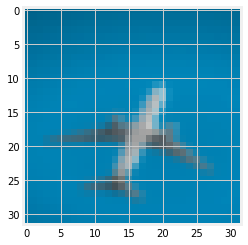

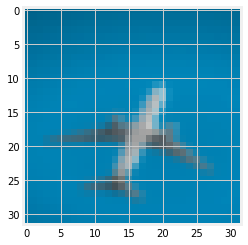

In [ ]:
#resize the image
from skimage.transform import resize
resized_image = resize(new_image, (32,32,3))
img = plt.imshow(resized_image)

In [ ]:
# lets get the prediction

predictions = model.predict(np.array([resized_image]))
predictions

array([[8.9346755e-01, 3.9541064e-06, 3.1991679e-02, 2.0469235e-04,
        1.7322780e-04, 5.3081053e-06, 7.0711452e-05, 2.7766765e-07,
        7.4074164e-02, 8.5411139e-06]], dtype=float32)

In [ ]:
#short the predictions
list_index = [0,1,2,3,4,5,6,7,8,9]
x=predictions

for i in range(10):
  for j in range(10):
    if x[0][list_index[i]] > x[0][list_index[j]]:
     temp = list_index[i]
     list_index[i] = list_index[j]
     list_index[j] = temp

print(list_index)    

[0, 8, 2, 3, 4, 6, 9, 5, 1, 7]


In [ ]:
#print the most likely classes for image
for i in range(5):
  print(classification[list_index[i]], ':', predictions[0][list_index[i]]*100,'%')

airplane : 89.34675455093384 %
ship : 7.40741640329361 %
bird : 3.199167922139168 %
cat : 0.02046923473244533 %
deer : 0.017322780331596732 %


*The above results for image shows that it is 89% a airplane, which is accurate and a pretty good prediction from our Model.*

In [17]:
#lets check more examples
from google.colab import files
uploaded = files.upload()

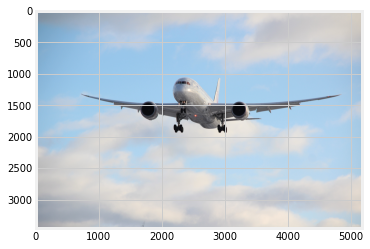

In [ ]:
new_image = plt.imread('plane.jpg')
img = plt.imshow(new_image)

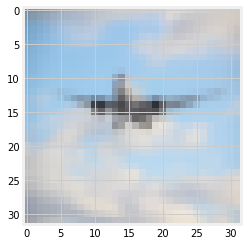

In [ ]:
from skimage.transform import resize
resized_image = resize(new_image, (32,32,3))
img = plt.imshow(resized_image)

In [ ]:
predictions = model.predict(np.array([resized_image]))
predictions

array([[9.5313370e-01, 1.5014580e-05, 1.5457201e-02, 1.6841586e-04,
        2.0152185e-04, 8.6619293e-06, 1.1464757e-05, 1.1964747e-06,
        3.0980732e-02, 2.2074904e-05]], dtype=float32)

In [ ]:
for i in range(5):
  print(classification[list_index[i]], ':', predictions[0][list_index[i]]*100,'%')

airplane : 95.31337022781372 %
ship : 3.0980732291936874 %
bird : 1.5457200817763805 %
cat : 0.016841586329974234 %
deer : 0.020152184879407287 %


**We can check for different images provided by the user and see what model comes up with and further tune it as per requirements.**